Some specs:
-Ubuntu>=18.04
-Create students pip environment with: conda env create --file environment.yaml
-Dataset: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

Questions
- What are the reasons for studend dropout?
- What is the dropout difference between the morning and evening shifts?
- What is the relationship between school performance and dropout and the educational level of the parents?

## Data Loading

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df_dropout = pd.read_csv("../data/dataset.csv")
df_dropout.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data collection and validation 

### What type are the variables?

In [4]:
df_dropout.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

### How many variables of each type we have?

In [5]:
df_dropout.dtypes.value_counts()

int64      29
float64     5
object      1
dtype: int64

### How many variables and observations we have?

In [6]:
df_dropout.shape

(4424, 35)

### Do we have explicit null values?

*We do not have explicit null values

In [7]:
df_dropout.isna().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                            False
Scholarship holder                                False
Age at enrollment                               

## Counting and proportions

### Dataset descriptions

In [8]:
df_dropout.describe(include="all")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Numerical

In [9]:
df_dropout.describe(include="number")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Categorical

In [10]:
df_dropout.describe(include="object")

,Target
count,4424
unique,3
top,Graduate
freq,2209


*We have many categorical variables with integer types for example: marital status or the daytime or evening attendance.

### Categorical variable visualization *Target

With barplot

{<Axes: xlabel='Target', ylabel='count'>}

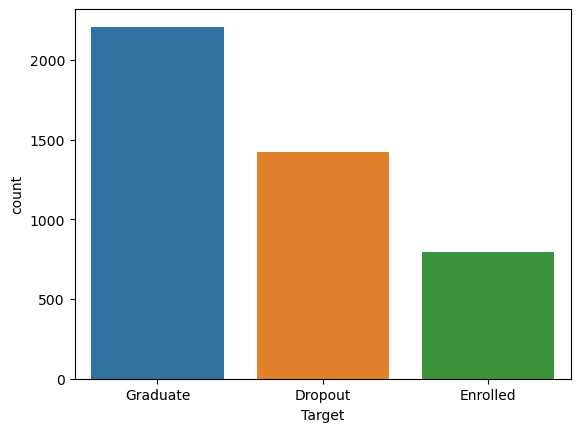

In [12]:
df_dropout.value_counts("Target", sort=True).reset_index(name = "count").pipe(
    lambda df: {
        sns.barplot(
            data=df,
            x="Target",
            y="count"
        )
    }
)


## Measures of central tendency *Age at enrollment

### Mean

With pandas

In [22]:
df_dropout["Age at enrollment"].mean()

23.265144665461122

With numpy

In [24]:
np.mean(df_dropout["Age at enrollment"])

23.265144665461122

### Median

In [26]:
df_dropout["Age at enrollment"].median()

20.0

### Mode

In [29]:
df_dropout["Age at enrollment"].mode()

0    18
Name: Age at enrollment, dtype: int64

## Measures of dispersion

### Max value

In [30]:
df_dropout["Age at enrollment"].max()

70

### Min value

In [34]:
df_dropout["Age at enrollment"].min()

17

### Range

In [32]:
df_dropout["Age at enrollment"].max() - df_dropout["Age at enrollment"].min()

53

### Stdandard deviation

In [35]:
df_dropout["Age at enrollment"].std()

7.587815615029815

### Interquantile range(IQR)

In [36]:
df_dropout["Age at enrollment"].quantile(.75)

25.0

In [37]:
df_dropout["Age at enrollment"].quantile(.25)

19.0

In [38]:
df_dropout["Age at enrollment"].quantile(.75) - df_dropout["Age at enrollment"].quantile(.25)

6.0

In [39]:
(
    df_dropout
    .quantile(q=[.75,.5,.25])
    .transpose()
    .rename_axis("variable")
    .reset_index()
    .assign(
        iqr = lambda df: df[.75] -df[.25]
    )
)

/tmp/ipykernel_32240/1747048276.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .quantile(q=[.75,.5,.25])


,variable,0.75,0.5,0.25,iqr
0,Marital status,1.000000,1.000000,1.00,0.000000
1,Application mode,12.000000,8.000000,1.00,11.000000
2,Application order,2.000000,1.000000,1.00,1.000000
3,Course,13.000000,10.000000,6.00,7.000000
4,Daytime/evening attendance,1.000000,1.000000,1.00,0.000000
5,Previous qualification,1.000000,1.000000,1.00,0.000000
6,Nacionality,1.000000,1.000000,1.00,0.000000
7,Mother's qualification,22.000000,13.000000,2.00,20.000000
8,Father's qualification,27.000000,14.000000,3.00,24.000000
9,Mother's occupation,10.000000,6.000000,5.00,5.000000


## Data distribution

### Histogram

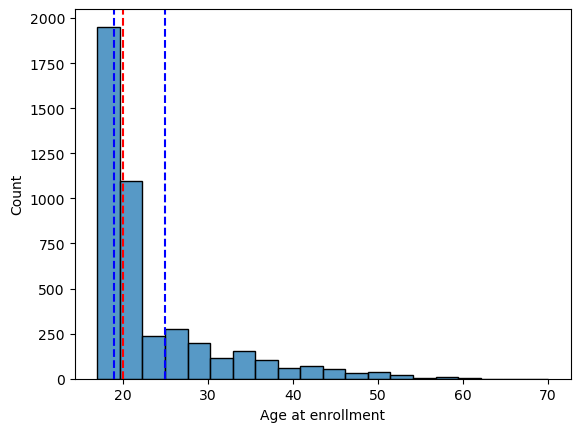

In [43]:
sns.histplot(
    data=df_dropout,
    x = "Age at enrollment",
    bins = 20
)
##Median line
plt.axvline(
    x= df_dropout["Age at enrollment"].median(),
    color="red",
    linestyle="dashed"
)
##Quantile .25 line
plt.axvline(
    x= df_dropout["Age at enrollment"].quantile(.25),
    color="blue",
    linestyle="dashed"
)

##Quantile .75 line
plt.axvline(
    x= df_dropout["Age at enrollment"].quantile(.75),
    color="blue",
    linestyle="dashed"
)